In [ ]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 46kB/s 
     |████████████████████████████████| 3.8MB 41.1MB/s 
     |████████████████████████████████| 512kB 37.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=aeb56bb64ce533b23dc5190e4667c532df0f54820e891ed00c0827b45b470456
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: 

In [ ]:
import tensorflow

In [ ]:
tensorflow.__version__

'1.15.0'

In [ ]:
!pip install kaggle

In [ ]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
ls -a

coco_annotation.py          kmeans.py            voc_annotation.py
convert.py                  LICENSE              yolo3/
darknet53.cfg               model_data/          yolo.py
font/                       __pycache__/         yolov3.cfg
.git/                       README.md            yolov3-tiny.cfg
.gitignore                  sample/              yolov3.weights
IMG_20200314_172705094.jpg  train_bottleneck.py  yolo_video.py
IMG_20200403_073534422.jpg  train.py


In [ ]:
cd /content/drive/"My Drive"

/content/drive/My Drive


# New Section

In [ ]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = {"username":"hideakiishii","key":"2a74382de7f45456c1134d153e825a5c"}
with open('/content/drive/My Drive/kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!chmod 600 '/content/drive/My Drive/kaggle/kaggle.json'

In [ ]:
pwd

'/content/drive/My Drive'

In [ ]:
ls -a kaggle

kaggle.json


In [ ]:
mkdir　/root/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!cp -R '/content/drive/My Drive/kaggle/kaggle.json' /root/.kaggle/

In [ ]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [ ]:
# kaggle APIコマンドが使えるかどうかを確認


!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
tpu-getting-started                               2030-06-03 23:59:00  Getting Started      Kudos         41           False  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       3396           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      25827            True  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       5799            True  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        572           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       1828   

In [ ]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [ ]:
# simpsonデータセットのAPIコマンドでデータセットをダウンロードする
# APIコマンドはこちらのサイトを参照。https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

!kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

 99% 1.07G/1.08G [00:11<00:00, 115MB/s]
100% 1.08G/1.08G [00:11<00:00, 103MB/s]


In [ ]:
!unzip /content/drive/'My Drive'/the-simpsons-characters-dataset.zip  -d Simpsons

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/duckrabbits/ObjectDetection.git

fatal: destination path 'ObjectDetection' already exists and is not an empty directory.


In [ ]:
# https://github.com/duckrabbits/ObjectDetection/tree/master
# この後、上述のgithubのreadmeに沿って、simpsons_datasetフォルダをプロジェクトフォルダ配下に格納しましょう。
# testデータなども同様に準備してみよう。

In [ ]:
mv Simpsons/simpsons_dataset ObjectDetection/

mv: cannot stat 'Simpsons/simpsons_dataset': No such file or directory


In [ ]:
cd ObjectDetection

/content/drive/My Drive/ObjectDetection


In [ ]:
ls -a

annotation.txt  .git/       model/   output/     README.md  simpsons_dataset/
.DS_Store       .gitignore  out.csv  predict.py  save/      train.py


# 2.Faster R-CNN
Faster R-CNN[1]の実装を動かします。  
[1]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99  
https://arxiv.org/pdf/1506.01497.pdf  
  
以下のものを使用してください。Kerasを使用した実装です。  
  
duckrabbits/ObjectDetection at master

# 【問題1】学習と推定
READMEを参考に上記実装を動かしてください。

In [ ]:
pip install keras==2.2.4

## ＊＊＊＊　学習　＊＊＊＊

In [ ]:
!python train.py -p annotation.txt --n_epochs 30 --n_iters 100

Using TensorFlow backend.
Parsing annotation files
Traceback (most recent call last):
  File "train.py", line 195, in <module>
    main()
  File "train.py", line 56, in main
    all_imgs, classes_count, class_mapping = get_data(args.path)
  File "/content/drive/My Drive/ObjectDetection/model/parser.py", line 26, in get_data
    img = cv2.imread(filename)
KeyboardInterrupt


# ＊＊＊＊　推定　＊＊＊＊

In [ ]:
!python predict.py -i /content/Simpsons/kaggle_simpson_testset/kaggle_simpson_testset -c '/content/drive/My Drive/ObjectDetection/save/train_20200622-063449_config.pickle'

Using TensorFlow backend.










2020-06-23 02:08:37.524057: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-23 02:08:37.528711: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-06-23 02:08:37.529259: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x9f4e000 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-06-23 02:08:37.529327: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-06-23 02:08:37.534196: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-23 02:08:37.668425: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node ze

# 【問題2】コードリーディング
上記実装のコードリーディングを行ってください。  
まず、Faster R-CNN[1]において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。  
  
（例）  
RPNを実現しているコードはどこか  
RoIプーリングを実現しているコードはどこか  
  
フレームワークには畳み込み層など一般的なものはクラスが用意されていますが、RoIプーリングなど特定の手法限定のものは用意されていません。オリジナルのレイヤーを作成することが可能であり、Kerasであれば以下のページに情報がまとまっています。  
オリジナルのKerasレイヤーを作成する - Keras Documentation  
  
《参考》  
KerasではVGG16のクラスが用意されているため、簡単に利用ができます。include_top=Falseの引数を与えることで、出力のための全結合層部分が除かれます。weights='imagenet'でImageNetを利用した学習済みモデルも手に入り、転移学習 が行えます。weights='None'とすればランダムな初期化となります。  
Applications - Keras Documentation

## ① RPNを実現しているコードはどこか
  





### 「train.py」の「main」でRPNのモデルを取得

```python
def main():

    model_rpn, model_classifier, model_all = faster_rcnn.get_model(C, classes_count)
```

### 「faster_rcnn.py」の「get_model」でRPNを設定

```python
def get_model(C, classes_count):

    # define the base network (resnet here)
    shared_layers = nn.nn_base(img_input, trainable=True)

    # define the RPN, built on the base layers
    num_anchors = len(C.anchor_box_scales) * len(C.anchor_box_ratios)

    rpn = nn.rpn(shared_layers, num_anchors)
```

### 「resnet.py」の「rpn」でRPNを作成

```python
def rpn(base_layers,num_anchors):
    
      x = Convolution2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)
      x_class = Convolution2D(num_anchors, (1, 1), activation='sigmoid', kernel_initializer='uniform', name='rpn_out_class')(x)
      x_regr = Convolution2D(num_anchors * 4, (1, 1), activation='linear', kernel_initializer='zero', name='rpn_out_regress')(x)    
```

## ② RoIプーリングを実現しているコードはどこか

### 「RoiPoolingConv.py」の「RoiPoolingConv」クラスでRoIプーリングを実現している

```python
class RoiPoolingConv(Layer):
    def __init__(self, pool_size, num_rois, **kwargs):

        self.dim_ordering = K.image_dim_ordering()
        assert self.dim_ordering in {'tf', 'th'}, 'dim_ordering must be in {tf, th}'

        self.pool_size = pool_size
        self.num_rois = num_rois

        super(RoiPoolingConv, self).__init__(**kwargs)

    def build(self, input_shape):
        if self.dim_ordering == 'th':
            self.nb_channels = input_shape[0][1]
        elif self.dim_ordering == 'tf':
            self.nb_channels = input_shape[0][3]

    def compute_output_shape(self, input_shape):
        if self.dim_ordering == 'th':
            return None, self.num_rois, self.nb_channels, self.pool_size, self.pool_size
        else:
            return None, self.num_rois, self.pool_size, self.pool_size, self.nb_channels

    def call(self, x, mask=None):

        assert(len(x) == 2)

        img = x[0]
        rois = x[1]

        input_shape = K.shape(img)

        outputs = []

        for roi_idx in range(self.num_rois):

            x = rois[0, roi_idx, 0]
            y = rois[0, roi_idx, 1]
            w = rois[0, roi_idx, 2]
            h = rois[0, roi_idx, 3]

            row_length = w / float(self.pool_size)
            col_length = h / float(self.pool_size)

            num_pool_regions = self.pool_size

            if self.dim_ordering == 'th':
                for jy in range(num_pool_regions):
                    for ix in range(num_pool_regions):
                        x1 = x + ix * row_length
                        x2 = x1 + row_length
                        y1 = y + jy * col_length
                        y2 = y1 + col_length

                        x1 = K.cast(x1, 'int32')
                        x2 = K.cast(x2, 'int32')
                        y1 = K.cast(y1, 'int32')
                        y2 = K.cast(y2, 'int32')

                        x2 = x1 + K.maximum(1,x2-x1)
                        y2 = y1 + K.maximum(1,y2-y1)

                        new_shape = [input_shape[0], input_shape[1],
                                     y2 - y1, x2 - x1]

                        x_crop = img[:, :, y1:y2, x1:x2]
                        xm = K.reshape(x_crop, new_shape)
                        pooled_val = K.max(xm, axis=(2, 3))
                        outputs.append(pooled_val)

            elif self.dim_ordering == 'tf':
                x = K.cast(x, 'int32')
                y = K.cast(y, 'int32')
                w = K.cast(w, 'int32')
                h = K.cast(h, 'int32')

                rs = tf.image.resize_images(img[:, y:y+h, x:x+w, :], (self.pool_size, self.pool_size))
                outputs.append(rs)

        final_output = K.concatenate(outputs, axis=0)
        final_output = K.reshape(final_output, (1, self.num_rois, self.pool_size, self.pool_size, self.nb_channels))

        if self.dim_ordering == 'th':
            final_output = K.permute_dimensions(final_output, (0, 1, 4, 2, 3))
        else:
            final_output = K.permute_dimensions(final_output, (0, 1, 2, 3, 4))

        return final_output
```

# 3.YOLOv3
シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。YOLOv3[2]のKeras実装を使います。  
  
qqwweee/keras-yolo3: A Keras implementation of YOLOv3 (Tensorflow backend)  
  
[2]Jeseph Redmon, Ali Farhadi. YOLOv3: An Incremental Improvement  
  
https://pjreddie.com/media/files/papers/YOLOv3.pdf

# 【問題3】学習済みの重みによる推定
学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startの項に記載されています。  
まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。  
出力結果を課題の一部として提出してください。  

In [ ]:
cd '/content/drive/My Drive'

/content/drive/My Drive


# YOLO v3 のクローンを作成

In [ ]:
!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.07 KiB | 797.00 KiB/s, done.
Resolving deltas: 100% (65/65), done.


In [ ]:
cd '/content/drive/My Drive/keras-yolo3'

/content/drive/My Drive/keras-yolo3


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-23 04:32:11--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   357KB/s    in 18m 3s  

2020-06-23 04:50:16 (224 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
#事前学習済みの重みをロード
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2020-06-23 02:12:46.390925: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-23 02:12:46.396420: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-06-23 02:12:46.396795: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1a4ebc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-06-23 02:12:46.396831: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-06-23 02:12:46.398945: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-23 02:12:46.479325: I tensorflow

In [ ]:
!python yolo_video.py --image 

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2020-06-23 02:49:19.671503: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-23 02:49:19.676834: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-06-23 02:49:19.677126: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x12cebc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-06-23 02:49:19.677162: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-06-23 02:49:19.679213: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-23 02:49:19.756883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative va

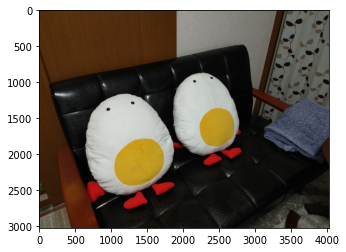

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#input_image
im = Image.open('/content/drive/My Drive/keras-yolo3/IMG_20200403_073534422.jpg')
#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

Found 4 boxes for img  
sofa 0.36 (243, 552) (3942, 2940)  
chair 0.60 (243, 552) (3942, 2940)  
sports ball 0.40 (1811, 980) (2856, 2014)  
bench 0.75 (152, 565) (3301, 2936)  
4.267909533999955

ソファーは「sofa」「chair」「bench」として認識した

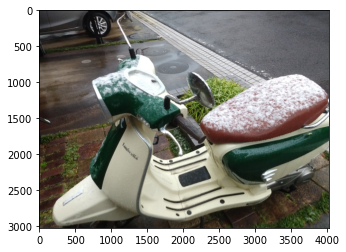

In [ ]:
#input_image
im = Image.open('/content/drive/My Drive/keras-yolo3/IMG_20200314_172705094.jpg')
#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

Found 2 boxes for img  
motorbike 0.92 (191, 596) (3943, 3022)  
car 0.92 (0, 15) (1165, 423)  
0.4783418810002331  

スクーターと車を認識した

# 【問題4】学習のためのファイルを作成
新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。  
  
アノテーションファイルの形式が問題1の実装とは異なるため変換する必要があります。

## ① シンプソンズデータセットをYOLOのディレクトリへコピー

In [ ]:
#!cp -rp /content/drive/'My Drive'/ObjectDetection/simpsons_dataset/simpsons_dataset /content/drive/'My Drive'/keras-yolo3/simpsons_dataset
!mv /content/drive/'My Drive'/ObjectDetection/simpsons_dataset/ /content/drive/'My Drive'/keras-yolo3/

## ② アノテーションデータをYOLOのディレクトリへコピー

In [ ]:
!cp /content/drive/'My Drive'/ObjectDetection/annotation.txt /content/drive/'My Drive'/keras-yolo3/annotation.txt

In [ ]:
cd /content/drive/'My Drive'/keras-yolo3

/content/drive/My Drive/keras-yolo3


In [ ]:
%pwd

'/content/drive/My Drive/keras-yolo3'

## ③ アノテーションデータの変換

In [ ]:
import pandas as pd

# アノテーションデータの確認
annotation_df = pd.read_csv('annotation.txt', header=None)
n_row, n_col = annotation_df.shape
print(n_row,n_col)
annotation_df.head()

7889 6


,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,abraham_grampa_simpson
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,abraham_grampa_simpson
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,abraham_grampa_simpson
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,abraham_grampa_simpson
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,abraham_grampa_simpson


In [ ]:
label = annotation_df.iloc[:,5].unique()
label,label.size

(array(['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson',
        'charles_montgomery_burns', 'chief_wiggum', 'comic_book_guy',
        'edna_krabappel', 'homer_simpson', 'kent_brockman',
        'krusty_the_clown', 'lisa_simpson', 'marge_simpson',
        'milhouse_van_houten', 'moe_szyslak', 'ned_flanders',
        'nelson_muntz', 'principal_skinner', 'sideshow_bob'], dtype=object),
 18)

In [ ]:
from sklearn.preprocessing import LabelEncoder

#LabelEncoderのインスタンス生成
le = LabelEncoder()
#ラベルを取得
annotation_df.iloc[:,5] = le.fit_transform(annotation_df.iloc[:,5])
annotation_df.tail()

,0,1,2,3,4,5
7884,simpsons_dataset/moe_szyslak/pic_0160.jpg,21,9,69,75,13
7885,simpsons_dataset/moe_szyslak/pic_0033.jpg,89,8,126,74,13
7886,simpsons_dataset/moe_szyslak/pic_0337.jpg,66,75,196,245,13
7887,simpsons_dataset/moe_szyslak/pic_1067.jpg,159,44,287,247,13
7888,simpsons_dataset/moe_szyslak/pic_0928.jpg,185,64,396,329,13


In [ ]:
annotation_df[6] = annotation_df[1].astype(str) + ',' + annotation_df[2].astype(str) + ',' + annotation_df[3].astype(str) + ',' + annotation_df[4].astype(str) + ',' + annotation_df[5].astype(str)
annotation_df.head()

,0,1,2,3,4,5,6
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,0,"57,72,52,72,0"
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,0,"80,31,337,354,0"
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,0,"128,48,285,407,0"
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,0,"72,126,158,275,0"
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,0,"123,61,294,416,0"


In [ ]:
annotation_df[0] = annotation_df[0].str.replace('simpsons_dataset', './simpsons_dataset')
annotation_df.head()

,0,1,2,3,4,5,6
0,./simpsons_dataset/abraham_grampa_simpson/pic_...,57,72,52,72,0,"57,72,52,72,0"
1,./simpsons_dataset/abraham_grampa_simpson/pic_...,80,31,337,354,0,"80,31,337,354,0"
2,./simpsons_dataset/abraham_grampa_simpson/pic_...,128,48,285,407,0,"128,48,285,407,0"
3,./simpsons_dataset/abraham_grampa_simpson/pic_...,72,126,158,275,0,"72,126,158,275,0"
4,./simpsons_dataset/abraham_grampa_simpson/pic_...,123,61,294,416,0,"123,61,294,416,0"


In [ ]:
%pwd

'/content/drive/My Drive/keras-yolo3'

## ④ アノテーションデータをファイル出力

In [ ]:
import csv
annotation_df.iloc[:, [0,6]].to_csv("train.txt", sep=" ", quoting=csv.QUOTE_NONE, header=False, index=False)

In [ ]:
#クラスラベルのファイルを作成
pd.Series(label).to_csv('/content/drive/My Drive/keras-yolo3/model_data/class_label.txt',index=False,header=False)

In [ ]:
# 事前学習済みの重みをロード
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2020-06-23 06:51:52.970963: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-23 06:51:52.976155: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-06-23 06:51:52.976436: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x16ccbc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-06-23 06:51:52.976474: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-06-23 06:51:52.978575: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-23 06:51:53.055013: I tensorflow

In [ ]:
%pwd

'/content/drive/My Drive/keras-yolo3'

# 【問題5】学習が行えることの確認
問題4で作成したファイルを使用して学習してください。実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。

In [ ]:
!python train.py

Using TensorFlow backend.








2020-06-23 07:12:44.516746: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-23 07:12:44.522117: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-06-23 07:12:44.522440: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2a5ebc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-06-23 07:12:44.522477: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-06-23 07:12:44.524637: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-23 07:12:44.601122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero